In [1]:
import pandas as pd
import os
import numpy as np

import expectation_reflection as EM

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/lotto_data.csv', index_col = 'idx')
df.sort_index(inplace = True)
df.head()

,1,2,3,4,5,6,7
idx,,,,,,,
1,10,23,29,33,37,40,16
2,9,13,21,25,32,42,2
3,11,16,19,21,27,31,30
4,14,27,30,31,40,42,2
5,16,24,29,40,41,42,3


In [3]:
test_ans = df.tail(1)
last_row_idx = df.index[-1]
df.drop(last_row_idx, inplace = True)
test_data = df.tail(1)
last_row_idx = df.index[-1]
df.drop(last_row_idx, inplace = True)
print(test_ans.head())
print(test_data.head())

      1   2   3   4   5   6   7
idx                            
1129  5  10  11  17  28  34  22
      1  2  3   4   5   6   7
idx                          
1128  1  5  8  16  28  33  45


In [4]:
def change_to_multihot(data, bonus_num = True, max_num = 45):
    if not bonus_num:
        data = data.drop(columns = ['7'])
    
    multi_hot = np.zeros((len(data), max_num), dtype = int)
    
    lotto_nums = data.values
    
    row_indices = np.arange(len(data)).repeat(7 if bonus_num else 6)
    col_indices = lotto_nums.flatten() - 1
    multi_hot[row_indices, col_indices] = 1
    
    return multi_hot

In [5]:
multihot_data = change_to_multihot(df, True)
multihot_data[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0]])

In [6]:
test_data = change_to_multihot(test_data, True)
test_data

array([[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1]])

In [7]:
# 특성과 목표 데이터 준비
x = multihot_data[:-1]
y = multihot_data[1:]  # 여기서는 x와 y가 동일하다고 가정합니다. 필요에 따라 y를 수정하세요.

# 모델 적합
h0, w, cost = EM.fit(x, y, niter_max=20, l2=0.01)

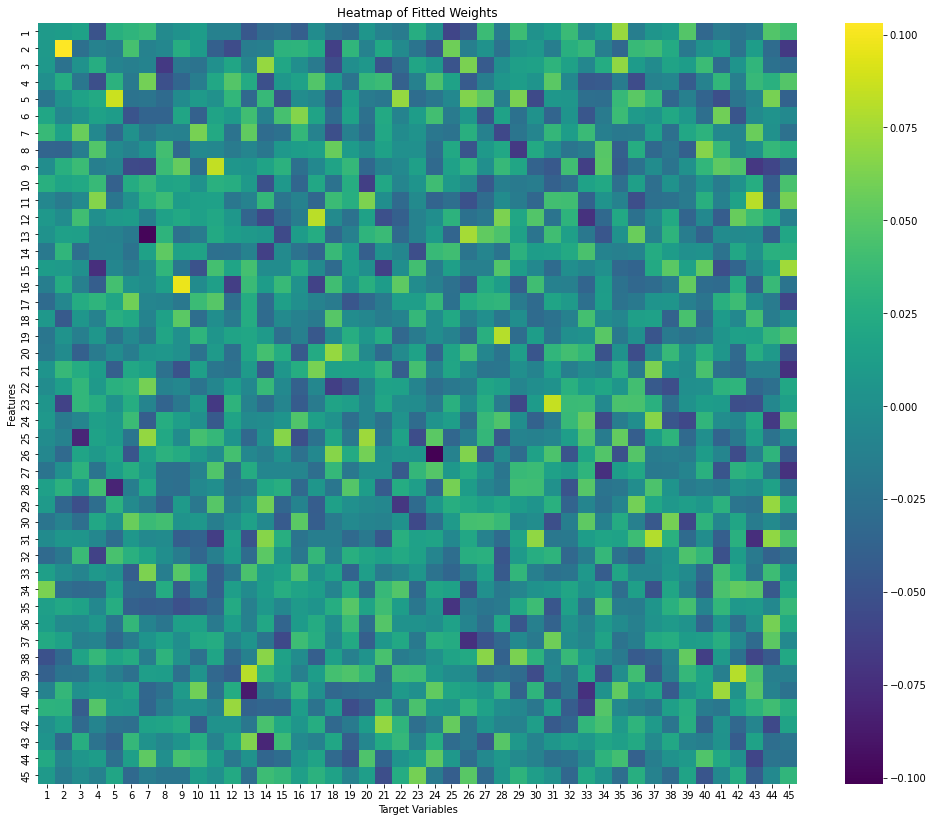

In [19]:
# 히트맵 시각화
plt.figure(figsize=(17, 14))
sns.heatmap(w, cmap='viridis', annot=False, fmt='.2f',
            xticklabels=np.arange(1, 46), yticklabels=np.arange(1, 46))
plt.title('Heatmap of Fitted Weights')
plt.xlabel('Target Variables')
plt.ylabel('Features')
plt.show()

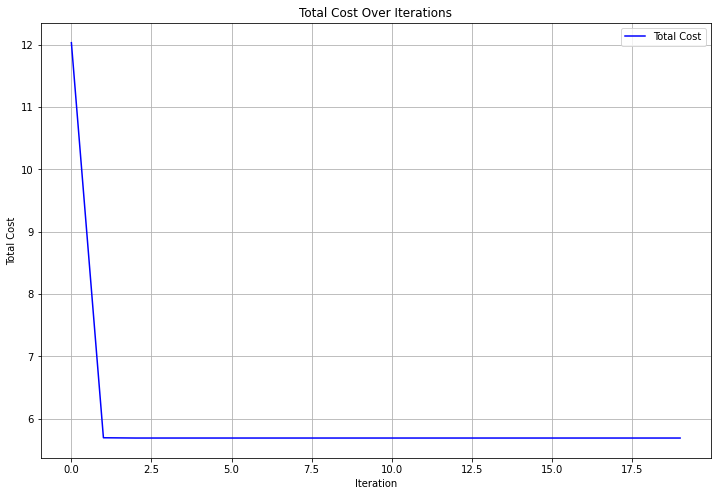

In [9]:
# 각 반복(iteration)에서 모든 목표 변수의 비용을 합산
total_cost = cost.sum(axis=1)

# 총 비용 시각화
plt.figure(figsize=(12, 8))
plt.plot(total_cost, label='Total Cost', color='blue')
plt.title('Total Cost Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Total Cost')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# 예측 함수
def predict(test_data, h0, w):
    # 입력 데이터를 기반으로 예측을 수행합니다.
    h = test_data.dot(w) + h0
    y_pred = np.tanh(h)  # 모델에서 사용한 활성화 함수
    return y_pred

In [12]:
# 예측 수행
predictions = predict(test_data, h0, w)
predictions

array([[0.13805566, 0.16721699, 0.15813275, 0.1807048 , 0.23204103,
        0.07175669, 0.23954797, 0.10442305, 0.1897726 , 0.18929912,
        0.11471707, 0.09130337, 0.11253979, 0.23082861, 0.19556547,
        0.14829079, 0.14494483, 0.20354128, 0.15255321, 0.20837096,
        0.03879685, 0.2742533 , 0.20565653, 0.02511308, 0.05858852,
        0.13995922, 0.26031584, 0.08405139, 0.22889935, 0.20113273,
        0.14198661, 0.04745776, 0.15982941, 0.15752196, 0.16844697,
        0.20174551, 0.16286873, 0.07557644, 0.20259397, 0.03625068,
        0.09106984, 0.16749621, 0.03758279, 0.37030386, 0.17999196]])

In [20]:
# 예측값이 가장 높은 숫자 6개 출력
top_indices = np.argsort(predictions[0])[::-1][:6]
top_numbers = top_indices + 1
top_numbers

array([44, 22, 27,  7,  5, 14])

In [21]:
test_ans

,1,2,3,4,5,6,7
idx,,,,,,,
1129,5,10,11,17,28,34,22
